
# Проверка гипотез


In [92]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [93]:
from numpy import linalg as LA

In [94]:
import scipy
print(scipy.__version__)

1.16.3


## Задание 1 (однородная игра)

Киллер - это весёлая лагерная игра. Краткие правила игры:

- Игроки пишут свои имена на карточках и кладут их в шляпу
- Игроки рандомно вытаскивают карточки из шляпы
- Полученное имя - имя жертвы
- Каждый игрок одновременно и убийца и жертва
- Чтобы убить другого игрока, надо оказаться с ним наедине и застрелить из пальца
- Жертва убитого становится новой жертвой игрока
- Побеждает тот, кто совершит наибольшее число убийств

На экономическом факультете было два раунда игры в киллера. Все убийства регистрировались в гугл-форме. В табличках `killer_time1.csv` и `killer_time2.csv` лежит время в часах, которое проходило между убийствами.

In [95]:
killer1 = pd.read_csv("killer_time1.csv").hours_between_kill.values
killer2 = pd.read_csv("killer_time2.csv").hours_between_kill.values

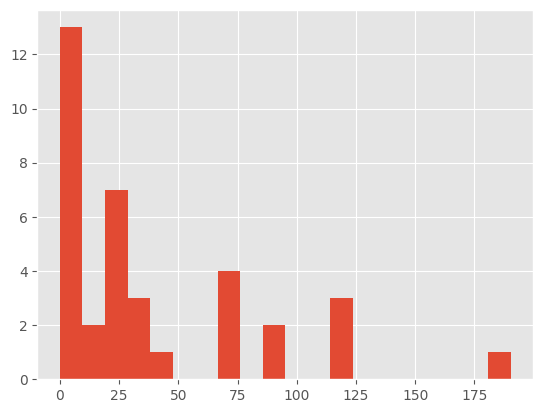

In [96]:
plt.hist(killer1, bins=20);

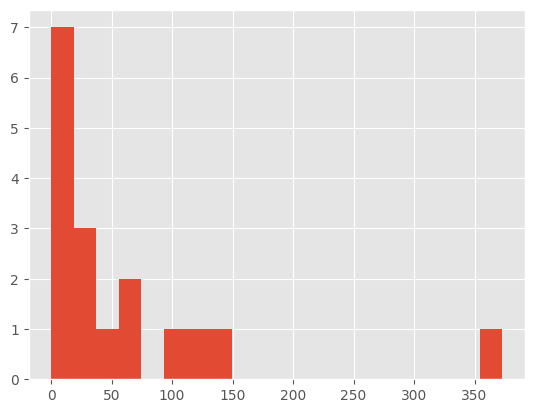

In [97]:
plt.hist(killer2, bins=20);

Распределение выглядит, как экспоненциальное. Более того, по гистограммам возникает ощущение, что это одинаковое распределение. С помощью теста Колмогорова-Смирнова проверьте гипотезу о том, что обе выборки пришли из одного и того же распределения, $p$-значение, полученное при проверке запишите в переменную `pvalue1`.

In [98]:
pvalue1 = sts.ks_2samp(killer1, killer2).pvalue

print(pvalue1)

0.5452509816793373


С помощью теста Колмогорова проверьте гипотезу о том, что время для первой игры имеет экспоненциальное распределение с параметром $\lambda = 0.026$, $p$-значение, полученное при проверке запишите в переменную `pvalue2`.

In [99]:
expon_dist = sts.expon(scale=1/0.026)
_, pvalue2 = sts.kstest(killer1, expon_dist.cdf)

print(pvalue2)

0.05735210547802583


In [100]:
# проверка того, что задание решено верно
assert pvalue1 > 0.5

# подобные тесты скрыты от вас

## Задание 2 (мыши и зеркало)

$16$ лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0168159104000061-gr1.gif)

В файле `mouses_mirror.txt` лежит информация о том, какую долю времени мышка проводила в клетке с зеркалом.

In [101]:
x = pd.read_csv('mouses_mirror.txt', header = None)[0].values

In [102]:
x

array([0.35, 0.64, 0.55, 0.54, 0.40, 0.43, 0.42, 0.48, 0.45, 0.48, 0.49,
       0.48, 0.48, 0.49, 0.47, 0.47])

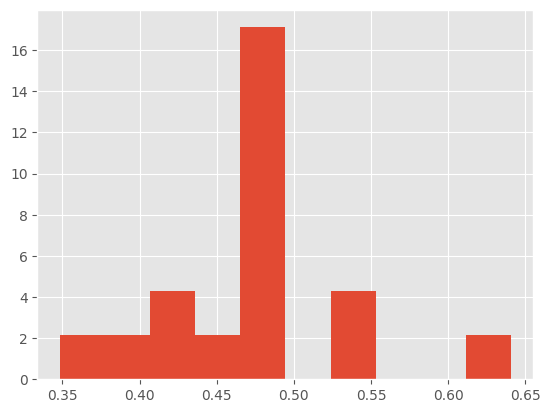

In [103]:
plt.hist(x, density=True, bins=10);

**Вопрос:** Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью критерия знаков. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия. Запишите в переменную `pvalue_1` получившееся в результате этого $p$-значение.

**Ответ:**

$H_0$: med(X) = 0.5

$H_A$: med(X) != 0.5

Критерий знаков позволяет проверить, является ли данное число $m$ медианой распределения, посредством статистики, являющейся суммой индикаторов $ \sum [X_i > m]$  и сравнением статистики - с $Bin(n, 0.5)$ . Если статистика попадает в "края" распределения, гипотеза $H_0$ отклоняется.

Проверим гипотезу на уровне значимости $5\%$

In [104]:
from statsmodels.stats.descriptivestats import sign_test

In [105]:
statistic, pvalue_1 = sign_test(x, mu0=0.5)

In [106]:
(x>0.5).sum()

np.int64(3)

In [107]:
print(statistic, pvalue_1)

-5.0 0.021270751953125


Учитывая, что $pvalue_1 < 0.025$ , гипотеза о том, что мышкам все равно где находится, отклоняется.

В данном случае ошибку второго рода $\beta$ можно оценить, используя размер эффекта зависящий не от абсолютной разницы между значениями параметров, а с точки зрения того, какая вероятностная масса отделяет проверяемое значение $m$ от настоящей медианы.

Если переформулировать

$H_A: P( m  < X < med(X)) \geq 0.1$

$\beta$ = $P(H_0 | H_A) = P( k_{\alpha/2} \leq ∑ [X_i > m] \leq k_{1 - \alpha/2} |  H_A ) $

$H_A: P( m  < X ) \geq 0.6$

$  ∑_{ k_{\alpha/2}}^{k_{1 - \alpha/2}} C^i_n [X_i > m] 0.6^i 0.4^{(n-i)}  $

In [108]:
alpha = 0.05

In [109]:
from scipy.stats import binom

In [110]:
n = x.shape[0]
print(n)

16


In [111]:
densities = np.zeros(n+1)
for i in range(0, n + 1):
  densities[i] = binom.pmf(i, n, 0.5)

In [112]:
densities_true = np.zeros(n+1)
for i in range(0, n + 1):
  densities_true[i] = binom.pmf(i, n, 0.6)

In [113]:
densities

array([0.00, 0.00, 0.00, 0.01, 0.03, 0.07, 0.12, 0.17, 0.20, 0.17, 0.12,
       0.07, 0.03, 0.01, 0.00, 0.00, 0.00])

Пусть k_low и k_high будут включающими

In [114]:
k_low = 0
while binom.cdf(k_low + 1, n, 0.5) < alpha/2:
  k_low += 1

k_high = n
while binom.cdf(k_high - 1, n, 0.5) > 1 - alpha/2:
  k_high -= 1

k_high += 1

print(k_low, k_high)

3 13


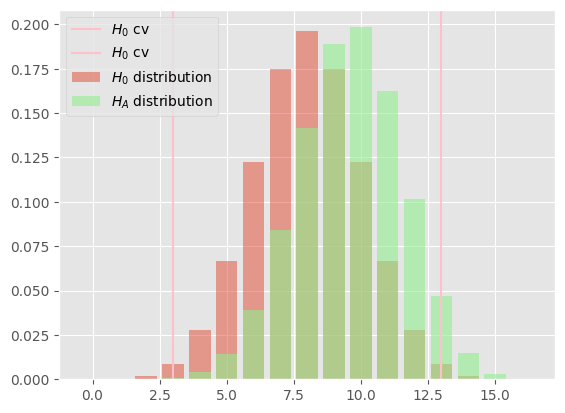

In [115]:
plt.bar(range(0, n+1), densities, alpha=0.5, label='$H_0$ distribution')
plt.bar(range(0, n+1), densities_true, color='lightgreen', alpha=0.6, label='$H_A$ distribution')
plt.axvline(k_low, color='pink', label='$H_0$ cv')
plt.axvline(k_high, color='pink', label='$H_0$ cv')

plt.legend()

In [116]:
beta = 0
for k in range(k_low + 1, k_high):
  beta += densities_true[k]

In [117]:
print(beta)

0.9339148078940158


Таким образом, с помощью критерия, вообще говоря, не слишком мощного, и с небольшим количеством данных удалось получить значимый результат.

**Вопрос:** Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью теста Вилкоксона. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_2` получившееся в результате этого $p$-значение.


$H_0$: med(X) = 0.5

$H_A$: med(X) != 0.5

Основная особенность теста Вилкоксона - он тестирует 0 на центр(точку симметрии) в предположении симметричного распределения.

Для того, чтобы использовать тест Вилкоксона как тест на медиану, нужно предположить симметричность распределения. Если сделать такое предположение в отношении мышек, то:

In [118]:
_, pvalue_2 = sts.wilcoxon(x, np.full_like(x, 0.5))

print(pvalue_2)

0.09344482421875


Таким образом, если прошлая гипотеза отклонялась, то в данном случае о том, что $med(X) = 0.5$ не отклоняется.

**Вопрос:** Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью асимптотического $z$-теста. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_3` получившееся в результате этого $p$-значение.


$H_0$: mean(X) = 0.5

$H_A$: mean(X) != 0.5

К особенностям Z-теста относят необходимость наличия большого количества данных, что вряд ли можно утверждать относительно N=16

In [119]:
from statsmodels.stats.weightstats import ztest,zconfint

_, pvalue_3 = ztest(x,  value=0.5, alternative='two-sided')

In [120]:
pvalue_3

np.float64(0.13460721078205806)

Таким образом, гипотеза о том, что мышкам все равно не отклоняется

In [121]:
# проверка того, что задание решено верно
assert pvalue_1 < 0.05
assert pvalue_2 > 0.05
assert pvalue_3 > 0.05

# подобные тесты скрыты от вас

**Вопрос** Объясните, почему `pvalue` от теста к тесту ведёт себя именно так. Подробнее про опыт с мышками читайте [в оригинальном исследовании.](https://www.sciencedirect.com/science/article/abs/pii/S0168159104000061)

**Ответ:** Можно сделать предположение о том, что больше информации охватывается z-test и тестом Вилкоксона по сравнению с критерием знаков, и  статистика посчитанная на наблюдаемых данных перестаёт противоречить целевому распределению.

## Задание 3 (энергетик)

Исследовательница Глафира считает, что любовь к энергетическим напиткам и успешность сдачи экзамена по математической статистике должны быть как-то связаны. Опросив $200$ своих однокурсников, она получила следующие результаты:

- Сдал, пьёт энергетик: 20
- Сдал, не пьёт энергетик: 120
- Завалил, пьёт энергетик: 40
- Завалил, не пьёт энергетик: 20

Правда ли, что энергетик оказывает на успешность сдачи экзамена какое-то влияние? Проверьте гипотезу с помощью критерия Пирсона. В качестве ответа запишите в переменную `pvalue` получившееся $p$-значение.

In [122]:
drinkers_results = np.array([20, 40]).astype(np.float32)
non_drinkers_results = np.array([120, 20]).astype(np.float32)

drinkers_results /= drinkers_results.sum()
non_drinkers_results /= non_drinkers_results.sum()

statistic, pvalue = sts.chisquare(drinkers_results,
                                  non_drinkers_results )

print(pvalue)

0.13441655037558725


In [123]:
real = np.array([20, 120, 40, 20]).astype(np.float32)
non_drinkers_results = np.array([120, 20]).astype(np.float32)

drinkers_results /= drinkers_results.sum()
non_drinkers_results /= non_drinkers_results.sum()

statistic, pvalue = sts.chisquare(drinkers_results,
                                  non_drinkers_results )

print(pvalue)

0.13441655037558725


In [124]:
pvalue

np.float64(0.13441655037558725)

In [125]:
# проверка того, что задание решено верно
#assert pvalue < 0.05

# подобные тесты скрыты от вас

## Задание 4 (бомбардировки)

В таблице `london_07-09-1940.tsv` лежат данные о бомбардировке Лондона 7 сентября 1940 года немецкой авиацией. Интересно выяснить, насколько прицельно велась бомбардировка. Если немецкие войска знали, где именно находятся британские военные объекты, они вели бы бомбардировку пристрельно.  

Ещё больше данных о бомбардировке Лондона ищите здесь: http://bombsight.org/data/sources/

In [126]:
df = pd.read_csv('london_07-09-1940.tsv', sep='\t')
print(df.shape)
df.head()

(751, 6)


,Time,Location,Type_of_bomb,Damage,x,y
0,0:08,"43 Southwark Park Road, SE16, London, UK",IB,Grocers: 3x2 roof damaged,-0.127660,51.507351
1,0:10,"49 Southwark Park road, Bermondsey, SE16, Lond...",IB,Bakers: 3x2 roof damaged,-0.054303,51.487794
2,0:15,"84 Southwark Park Road, SE16, London, UK",IB,front room on 1st floor and contents slightly ...,-0.127660,51.507351
3,0:18,"141 Braidwood Road, Catford SE6, London, UK",IB,10x6 roof damage,-0.025584,51.443299
4,0:20,"129 Killearn Road, Catford SE6, London, UK",IB,Front room on 1st floor severely damaged,-0.025584,51.443299


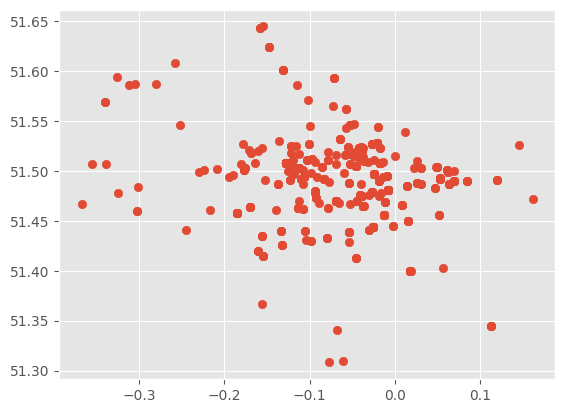

In [127]:
plt.scatter(df.x, df.y);

В колонках $x$ и $y$ лежат координаты точки, куда упала бомба. Разбейте Лондон решёткой размера $30 \times 30$ на $900$ небольших квадратных участков. С помощью функции `binned_statistic_2d` из пакета `scipy.stats`, подсчитайте как часто снаряд попадал на какой из участков. Поместите информацию об этом в переменную `ret`.

In [128]:
binx = np.linspace(df.x.min(), df.x.max(), 31)
biny = np.linspace(df.y.min(), df.y.max(), 31)

In [129]:
binned_stat =  sts.binned_statistic_2d(df.x, df.y, values=np.ones_like(df.x), bins=[binx, biny], statistic='sum')

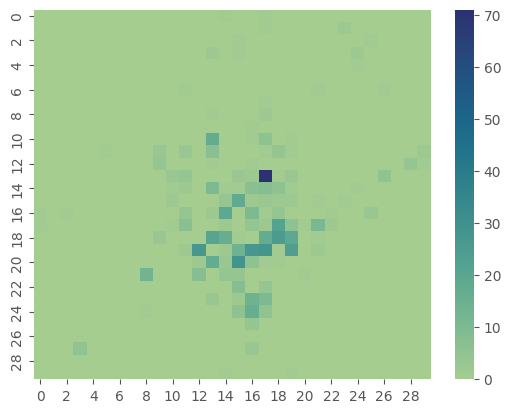

In [130]:
ret = binned_stat

sns.heatmap(ret.statistic, cmap="crest");

Распакуйте информацию о попаданиях в участки в вектор `z`. Нарисуте гистограмму для получившегося распределения.

In [131]:
z =ret.statistic.reshape(-1)
z[np.isnan(z)] = 0

<Axes: ylabel='Count'>

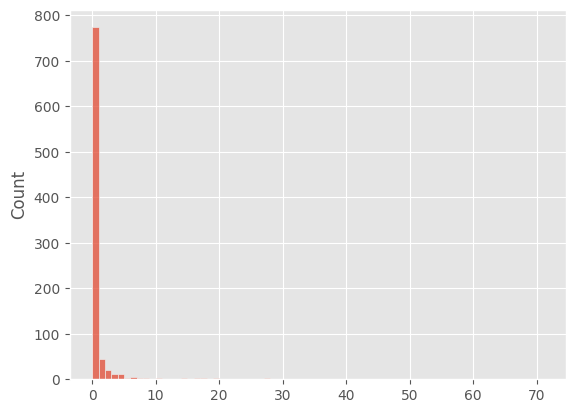

In [132]:
sns.histplot(data=z, binwidth=1)

Участков много, а вероятность попадания на отдельный участок мала. При справедливости гипотезы о низкой точности стрельбы мы можем воспользоваться законом редких событий:

> Если в схеме испытаний Бернулли $p \to 0$, а $n \to \infty$, оно сходится к распределению Пуассона.

Получается, что __при верности гипотезы о низкой точности стрельбы,__ число попаданий в квадрат имеет распределение Пуассона. Дополнительно будем предполагать, что попадания на разные участки независимы друг от друга.

C помощью критерия Пирсона проверьте гипотезу о том, что число попаданий на участок имеет распределение Пуассона. Прежде, чем вычислять статистику, объедините все наблюдения из хвоста в одно по аналогии с лекцией. Хвостом будем считать все наблюдения $\ge 9$. Получившуюся в результате расчётов статистику запишите в переменную `T`.

*Комментарий:*

Распределение Пуассона описывает вероятности получения заданного количества успехов в схеме бернулли, при определенных условиях на число испытаний $n$ и вероятность попадания $p$.

Здесь конечно есть некоторое допущение, как будто бы одновременно проводилось одинаковое число экспериментов с небольшой вероятностью, независимо в каждой ячейке.
Несколько затруднительно представить себе точную механику такого эксперимента, но можно вообразить, что самолет, осуществлявший бомбежку, пролетая над ячейкой,будет ли ее бомбить. При этом эксперименты для различных ячеек проводились не единовременно во времени, а, например, при пролетании самолета над очередной ячейкой.

Затруднительно определить в такой постановке также и количество проведенных испытаний, которое должно быть велико для каждой ячейки, так как видны только успехи (бомбовые удары).


In [133]:
#здесь и далее следует помнить
#что операции над срезом изменяют значения исходного массива
np_arr = np.array([1, 2, 3, 4])
np_slice = np_arr[0:2]
np_slice[1] = -557
print(np_arr)

[   1 -557    3    4]


In [134]:
strike_quantities, strike_frequencies = np.unique(z, return_counts=True)

In [135]:
#It is undesirable to have long tails of the distributions
#it is reasonable to unite long tails into one point
#all values >= aggregation_value, will be packed together

def unify_distribution_tail(values, frequencies, aggregation_value):
    idx_left = np.searchsorted(values, aggregation_value, side='left')

    if(idx_left==values.shape[0]):
        return values, frequencies #nothing to unify

    values_unified = values[:idx_left+1].copy()
    frequencies_unified = frequencies[:idx_left+1].copy()

    values_unified[idx_left] = aggregation_value
    frequencies_unified[idx_left] = frequencies[idx_left:].sum()

    return values_unified, frequencies_unified

In [136]:
#example of usage
sample_vals = np.array([1, 2, 3, 4])
sample_freq = np.array([0.5, 0.3, 0.15, 0.05])
unify_distribution_tail(sample_vals, sample_freq, 3)

(array([1, 2, 3]), array([0.50, 0.30, 0.20]))

In [137]:
unified_values, unified_frequencies = unify_distribution_tail(strike_quantities, strike_frequencies, 9)

print(unified_values, unified_frequencies )

[0.00 1.00 2.00 3.00 4.00 5.00 6.00 7.00 8.00 9.00] [774  45  20  11  12   3   5   3   3  24]


In [138]:
poisson_support_truncated = np.arange(0, 10)
poisson_pmf_values = sts.poisson.pmf(poisson_support_truncated, mu=z.mean())

poisson_pmf_values[9] += sts.poisson.sf(9, mu=z.mean())

In [139]:
unified_frequencies = unified_frequencies / unified_frequencies.sum()
#poisson_pmf_values = poisson_pmf_values  / poisson_pmf_values.sum()

In [140]:
np.set_printoptions(formatter={'float': '{:.2f}'.format})
print(unified_frequencies, '\n', poisson_pmf_values)

[0.86 0.05 0.02 0.01 0.01 0.00 0.01 0.00 0.00 0.03] 
 [0.43 0.36 0.15 0.04 0.01 0.00 0.00 0.00 0.00 0.00]


Применим тест Пирсона

In [141]:
T, pvalue = sts.chisquare(unified_frequencies, poisson_pmf_values)

print(T, pvalue)

2785.4219993658157 0.0


In [142]:
# проверка того, что задание решено верно
#assert T > 6000

# подобные тесты скрыты от вас

Какой вывод мы можем из этого сделать? Правда ли, что бомбардировка осуществлялась прицельно?

**Ответ:** есть отклонение полученного распределения от распределения Пуассона, что позволяет сделать выводы о том, что если формулировать случайную стрельбу таким образом, как мы это сделали, и предполагать, что все ячейки на карте участвовали в одинаковом количестве экспериметров, то такую гипотезу действительно можно отклонить, и есть довольно надежные свидетельства против такого механизма случайности стрельбы

## Задание 5 (дискриминация)

Компания Verizon - основная региональная телекоммуникационная компания в западной части США. Она отвечает за поддержание наземной телефонной связи (Incumbent Local Exchange Carrier, ILEC). Ее инфраструктуру в рамках антимонопольных законов о повышении конкуренции использует ряд  конкурентов, получивших название (Competing Local Exchange Carriers, CLEC).

Когда что-то шло не так, Verizon отвечала за ремонт своего оборудования и оборудования конкурентов. Она должна была делать ремонт оборудования конкурентов также быстро, как и ремонт своего оборудования. За этим следила комиссия по коммунальным услугам.

Периодически возникали подозрения, что Verizon ремонтирует чужое оборудование медленнее. Тим Хестерберг, автор [отличной статьи про бустрап,](https://arxiv.org/pdf/1411.5279.pdf) консультировал компанию Verizon во время слушаний о нарушениях. Комиссия сравнивала время ремонта для Verizon и других компаний. Чтобы определить есть ли нарушения, в каждом случае, она проверяла гипотезу о равенстве средних на уровне значимости $1\%$.

Если более $1\%$ тестов оказывались значимыми, компания должна была бы заплатить высокий штраф. Гипотезы проверялись с помощью $t$-статистик. После консультации Тима, Verizon предложила использовать тесты, робастные к выбросам и никак не завязанные на нормальность исходных распределений.

Мы в этом задании попробуем ответить на тот же вопрос, связанный с дискриминацией, но с помощью бустрапа. Для этого мы построим доверительный интервал для разности медиан и посмотрим входит ли в него ноль. Будем использовать уровень значимости в $1\%$. Доверительный интервал будем строить для одной CLEC-компании и для Verizon.

In [171]:
df = pd.read_csv('verizon.txt', sep='\t')
print(df.shape)

# ILEC - Verizion
# CLEC - внешние клиенты
df.head()

(1687, 2)


,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


Посмотрим на то, как распределено время ремонта для разных компаний, а также на число наблюдений, которым мы располагаем.

In [172]:
df.groupby('Group')['Time'].agg(['count', 'mean', 'median', 'std'])

,count,mean,median,std
Group,,,,
CLEC,23,16.509130,14.33,19.503576
ILEC,1664,8.411611,3.59,14.690039


В данных есть существенный перекос в количестве наблюдений. Среднее время ремонта CLEC почти вдвое больше, чем для ILEC. Вопрос в том, является ли это свидетельством дискриминации. Если посмотреть на распределение, можно заметить, что распределение времени на ремонт CLEC имеет как минимум один выброс. Тем не менее, если смотреть на медианы, которые робастны (нечувствительны) к выбросам, ситуация, связанная со временем оказывается ещё более драмматичной.

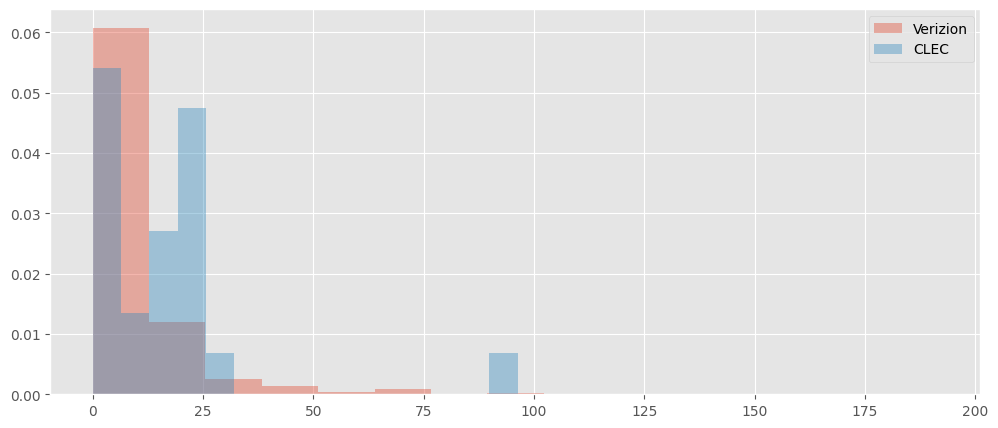

In [173]:
plt.figure(figsize=(12,5))
df[df.Group == 'ILEC'].Time.hist(bins=15, label='Verizion', alpha=0.4, density=True)
df[df.Group == 'CLEC'].Time.hist(bins=15, label='CLEC', alpha=0.4, density=True)
plt.legend();

__а)__ Постройте для разницы $med_{CLEC} - med_{Verizion}$ доверительный интервал Эфрона (перцентильный доверительный интервал).

In [174]:
alpha = 0.01

In [175]:
B_sample=10**4

In [176]:
clec = df[df['Group']=='CLEC']['Time'].to_numpy()
ilec = df[df['Group']=='ILEC']['Time'].to_numpy()

Построим доверительный интервал при помощи бутстрапа

In [177]:
def median_diff(data1, data2):
    return np.median(data1) - np.median(data2)

data = (clec, ilec)
res = sts.bootstrap(data, median_diff, n_resamples=B_sample, confidence_level=1 - alpha)

In [180]:
confidence_interval = res.confidence_interval

In [181]:
left = confidence_interval.low
right = confidence_interval.high

print(left , right)

1.7200000000000002 17.376451465741138


In [182]:
# проверка того, что задание решено верно
assert left > 1.6
assert right < 20

# подобные тесты скрыты от вас

В целом, перцентильный интервал выглядит самым простым вариантом оценивания, однако в реальности он даёт весьма плохие результаты, так как сильно зависит от того насколько хорошо изначальная выборка аппроксимирует истинное распределение случайной величины. В данной ситуации из-за того, что исходное распределение асимметрично, мы получаем смещение.

__б)__ Постройте для разницы $med_{CLEC} - med_{Verizion}$ доверительный интервал Дэвидсона и Хинкли (обратный перцентильный доверительный интервал).

In [190]:
clec_median = np.median(clec)
ilec_median = np.median(ilec)

median_diff_point_estimate = clec_median - ilec_median

In [194]:
median_diff_point_estimate

np.float64(10.74)

In [197]:
def median_diff_reverse(data1, data2):
    return (np.median(data1)  - np.median(data2)) - median_diff_point_estimate

# bootstrap requires data as a single sequence
data = (clec, ilec)
res = sts.bootstrap(data, median_diff_reverse, n_resamples=B_sample, confidence_level=1- alpha)

In [198]:
left, right = median_diff_point_estimate - res.confidence_interval.high , median_diff_point_estimate - res.confidence_interval.low

In [199]:
print(left, right)


4.060000000000002 19.77971130216732


In [200]:
# проверка того, что задание решено верно
assert left > 3
assert right < 22

# подобные тесты скрыты от вас

Холл в своей работе называл перцентильный интервал "the wrong pivot, backwards". Обратный перцентильный интервал для асимметричных распределений делает то же самое, но в обратном направлении.

__в)__ Постройте $t-$ перцентильный доверительный интервал:

1. Найдите точечную оценку неизвестного параметра (разность медиан) и точечную оценку стандартного отклонения
2. Сгенерируйте $10^5$ boostrap-выборок
3. Рассчитайте по каждой выбооке выборочную разницу медиан
4. Рассчитайте по каждой выборке стандартную ошибку
5. Найдите по каждой выборке $$t^* = \frac{\hat \theta^{*} - \hat{\theta}}{S^{*}}$$
6. Найдите для $t^{*}$ квантили уровня $0.05$ и $0.95$
7. Постройте доверительный интервал для разности медиан

В качестве $S^{*}$ исполизуйте сумму стандартных отклонений, посчитанных по выборкам $x$ и $y$. Конечно же, мы используем при таком подходе неправильное стандартное отклонение. При этом мы надеемся, что бутсрэп сам поправит нашу ошибку. При таком подходе главное, чтобы знаменатель сходился по вероятности к какому-нибудь пределу.

In [201]:
#1. найдем точечную оценку
theta_hat = (clec_median - ilec_median)

In [202]:
#2. сгенерируем 10**5 bootstrap-выборок
def get_bootstrap_sample(x, B_sample=1):
    N = x.size
    sample = np.random.choice(x, size=(N, B_sample), replace=True)

    if B_sample == 1:
        sample = sample.T[0]
    return sample


In [161]:
clec_bootstrap = get_bootstrap_sample(clec, B_sample=10**5)
ilec_bootstrap = get_bootstrap_sample(ilec, B_sample=10**5)

In [205]:
clec_bootstrap.shape

(23, 100000)

In [206]:
#3. найдем выборочную разницу медиан
clec_medians = np.median(clec_bootstrap, axis=0)
ilec_medians = np.median(ilec_bootstrap, axis=0)

In [207]:
median_differencies = clec_medians - ilec_medians

In [208]:
#4. Рассчитаем по каждой выборке бутстрап-стандартную ошибку
clec_se_bootstrap = clec_bootstrap.std(axis=0)
ilec_se_bootstrap = ilec_bootstrap.std(axis=0)

In [209]:
se_bootstrap = clec_se_bootstrap + ilec_se_bootstrap

In [210]:
#5. Найдем по каждой выборке значение t* статистики
t_distrubution = (median_differencies - theta_hat) / se_bootstrap

In [222]:
#6. Построим квантили для уровней
alpha = 0.01
computed_quantiles = sts.mstats.mquantiles(t_distrubution, prob=[alpha/2, 1 - alpha / 2])

In [224]:
se = ilec.std() + clec.std()

left = theta_hat - se * computed_quantiles[1]
right = theta_hat - se * computed_quantiles[0]

print(left, right)

1.8701913971800046 24.129421028365442


У $t$-bootstrap есть одно интересное свойство: он "уважает" асимметрию распределений при расчёте доверительных интервалов.

In [225]:
print(left , right)

1.8701913971800046 24.129421028365442


In [226]:
# проверка того, что задание решено верно
assert left < 2
assert right > 20

# подобные тесты скрыты от вас